In [1]:
import numpy as np
import time
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
def calculo_ganancia_registro(test_record,pred_record):
    if pred_record:
        if test_record:
            return 78000
        else:
            return -2000
    else:
        return 0

calculo_ganancia_array = np.frompyfunc(calculo_ganancia_registro,2,1)

def calculo_ganancia_total_a(y_test, y_pred):
    return sum(calculo_ganancia_array(y_test,y_pred))

def calculo_ganancia_total_ba(y_test,y_pred):
    ganancias = []
    for t,p in zip(y_test, y_pred):
        if p:
            if t:
                ganancias.append(78000)
            else:
                ganancias.append(-2000)
    return sum(ganancias)

def calculo_ganancia_total_bb(y_test,y_pred):
    ganancias = []
    for t,p in zip(y_test, y_pred):
        ganancias.append(calculo_ganancia_registro(t,p))
    return sum(ganancias)

def calculo_ganancia_total_bc(y_test,y_pred):
    return sum([calculo_ganancia_registro(t,p) for t,p in zip(y_test, y_pred)])

In [3]:
class Exp:
    def __init__(self):
        self.exp_records = {}

    def make_arrays(self, base_start=1, base_stop=6, num=100):
        t1 = time.time()
        self.num = num
        n_range = np.logspace(base_start, base_stop, num=num)
        self.test_arrays = []
        self.pred_arrays = []
        for v in n_range:
            n = int(v)
            test = np.random.randint(0,2,n)
            probas = np.random.rand(n)
            pred = probas > 0.025
            self.test_arrays.append(test)
            self.pred_arrays.append(pred)
        t2 = time.time()
        delta = t2-t1
        print(f'random samples construidos en {delta} segundos')

    def do_exp(self, func, func_name=''):
        gt1 = time.time()
        if not func_name:
            func_name = func.__name__
        
        self.exp_records[func_name] = []
        
        for y_test, y_pred in zip(self.test_arrays,self.pred_arrays):
            t1 = time.time()
            ganancia = func(y_test,y_pred)
            t2 = time.time()
            self.exp_records[func_name].append({'n': len(y_test), 't': t2-t1, 'g': ganancia})
        gt2 = time.time()
        delta = gt2-gt1
        print(f'calculo ganancias con {func_name} realizado en {delta} segundos')
   
    def make_df(self):
        ns = []
        gs = []
        for key in self.exp_records.keys():
            ns.append([rec['n'] for rec in self.exp_records[key]])
            gs.append([rec['g'] for rec in self.exp_records[key]])
        
        if len(self.exp_records) > 1:
            for i in range(1,len(self.exp_records.keys())):
                if ns[i] != ns[i-1]:
                    raise Exception('no coinciden ns')

                if gs[i] != gs[i-1]:
                    raise Exception('no coinciden gs')
        
        self.df = pd.DataFrame({'n':ns[0], 'g':gs[0]})
        
        for func_name, records in self.exp_records.items():
            self.df['t_'+func_name] = pd.Series([rec['t'] for rec in records])
                
        if self.df.shape[0] != self.num:
            raise Exception('no coincide df con num')
        print('df construida y validada')
    
    def make_plot(self,labels={},**kwargs):
        if not labels:
            labels = {k:k for k in self.exp_records.keys()}
        
        for func_name in self.exp_records.keys():
            plt.plot(self.df['n'],self.df['t_'+ func_name], label = labels[func_name])
        
        plt.legend()
        
        plt.xlabel('registros')
        plt.ylabel('segundos')

        for k,v in kwargs.items():
            try:
                #plt.__getattribute__(k)(v) #muy bardeado acá pero va bien: https://stackoverflow.com/questions/3061/calling-a-function-of-a-module-by-using-its-name-a-string
                method = getattr(plt,k) #esto por algún motivo es más aceptado.
                method(v)

            except:
                pass
        
        return plt #por algún motivo no funciona si paso el return a un finally
        
        
    def plot(self,labels={},**kwargs):
        self.make_plot(labels=labels,**kwargs)
        plt.show()

    def plot_ylog(self,labels={},**kwargs):
        plt = self.make_plot(labels=labels,**kwargs)
        plt.yscale('log')
        plt.ylabel('segundos (log)')
        plt.show()

### exps

random samples construidos en 1.4916365146636963 segundos
calculo ganancias con list comprehension (c/ función registro) realizado en 13.315202236175537 segundos
calculo ganancias con np.frompyfunc (c/función registro) realizado en 6.992689371109009 segundos
calculo ganancias con loop con zip + list (c/función registro) realizado en 13.210185766220093 segundos
calculo ganancias con loop con zip + list (if abreviado) realizado en 8.476622819900513 segundos
df construida y validada


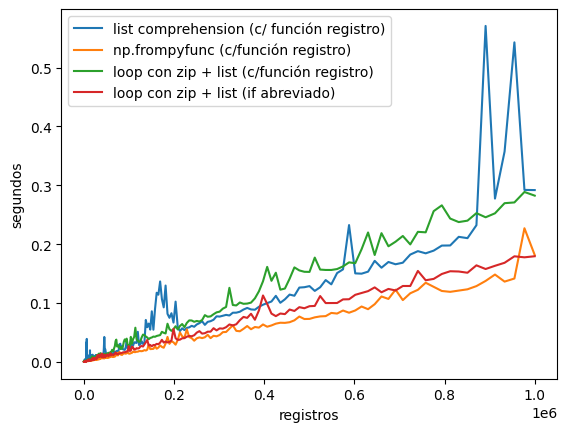

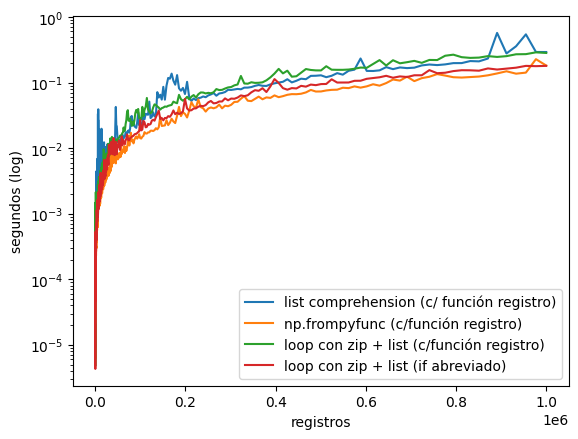

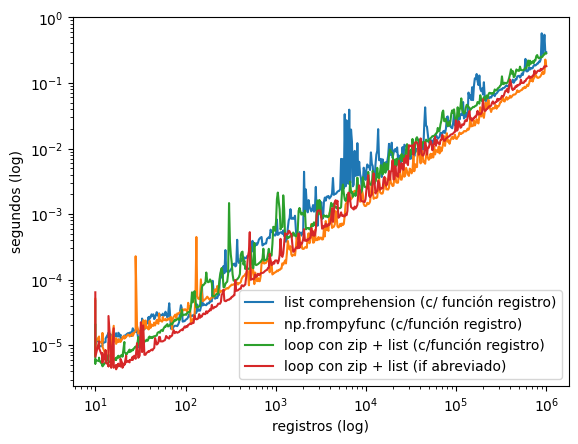

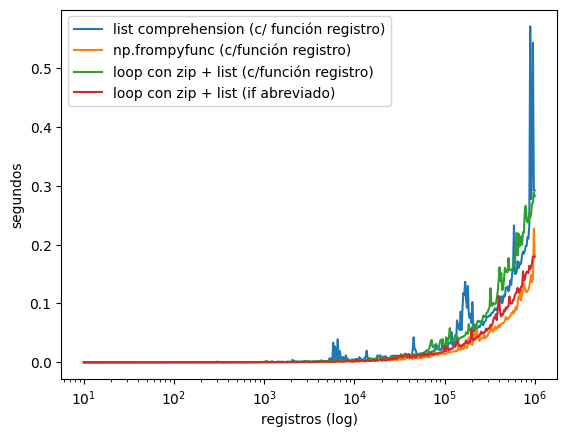

In [4]:
exp_0 = Exp()
exp_0.make_arrays(base_start=1,base_stop=6,num=500)
funcs = [    
    (calculo_ganancia_total_a,'np.frompyfunc (c/función registro)'),
    (calculo_ganancia_total_ba,'loop con zip + list (if abreviado)'),
    (calculo_ganancia_total_bb,'loop con zip + list (c/función registro)'),
    (calculo_ganancia_total_bc,'list comprehension (c/ función registro)')
]
np.random.shuffle(funcs)
for f in funcs:
    exp_0.do_exp(f[0], func_name= f[1])
exp_0.make_df()
exp_0.plot()
exp_0.plot_ylog()
exp_0.plot_ylog(xscale='log',xlabel='registros (log)')
exp_0.plot(xscale='log',xlabel='registros (log)')

random samples construidos en 0.24956989288330078 segundos
calculo ganancias con np.frompyfunc realizado en 1.4328157901763916 segundos
calculo ganancias con loop con zip + list realizado en 2.183689594268799 segundos
df construida y validada


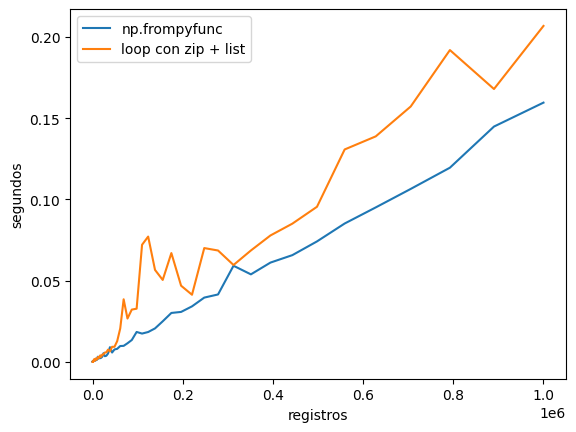

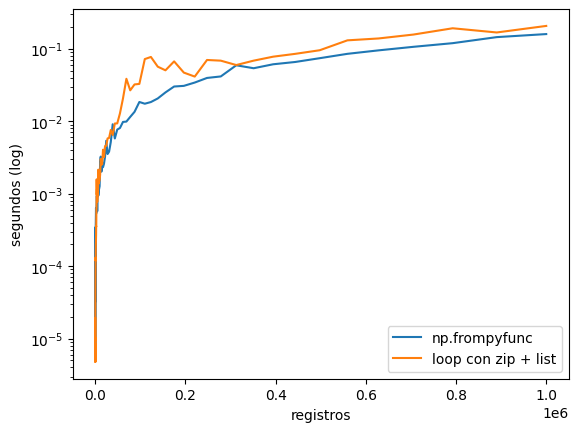

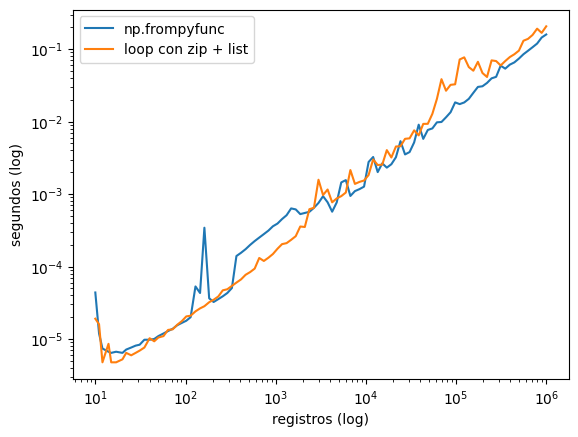

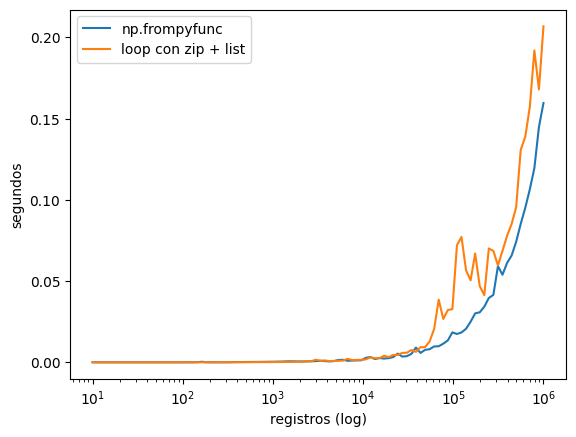

In [5]:
exp_1 = Exp()
exp_1.make_arrays()
funcs = [    
    (calculo_ganancia_total_a,'np.frompyfunc'),
    (calculo_ganancia_total_ba,'loop con zip + list')
]
np.random.shuffle(funcs)
for f in funcs:
    exp_1.do_exp(f[0], func_name= f[1])
exp_1.make_df()
exp_1.plot()
exp_1.plot_ylog()
exp_1.plot_ylog(xscale='log',xlabel='registros (log)')
exp_1.plot(xscale='log',xlabel='registros (log)')

random samples construidos en 0.10695123672485352 segundos
calculo ganancias con loop con zip + list realizado en 1.018763542175293 segundos
calculo ganancias con np.frompyfunc realizado en 0.8209657669067383 segundos
df construida y validada


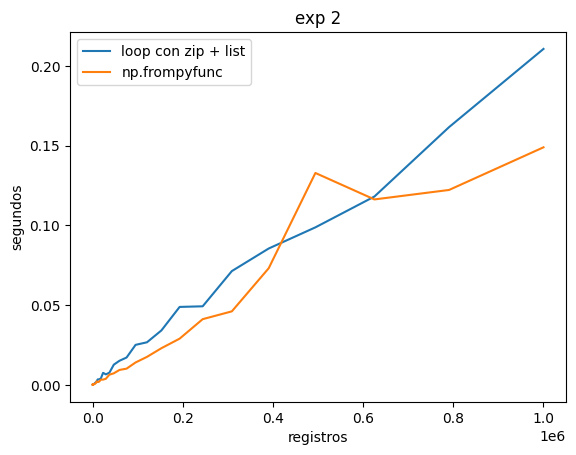

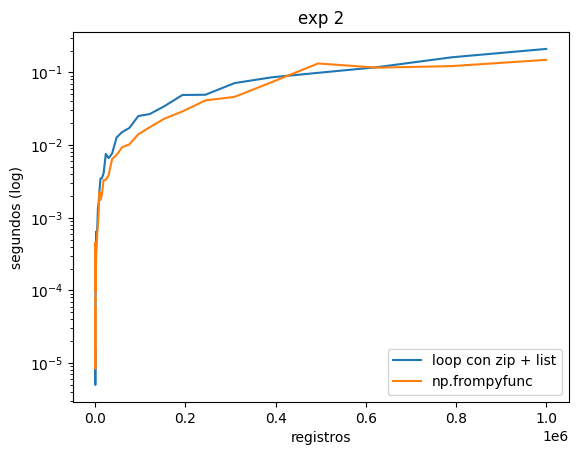

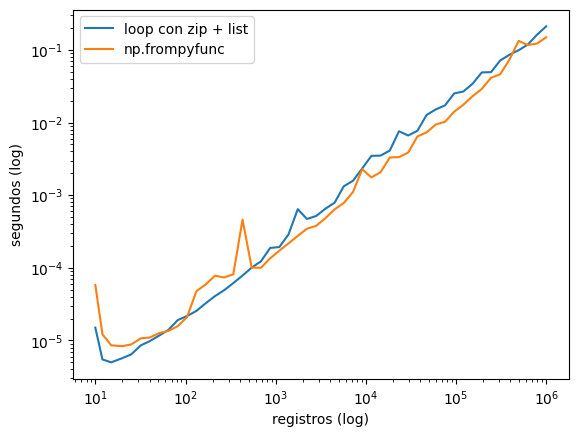

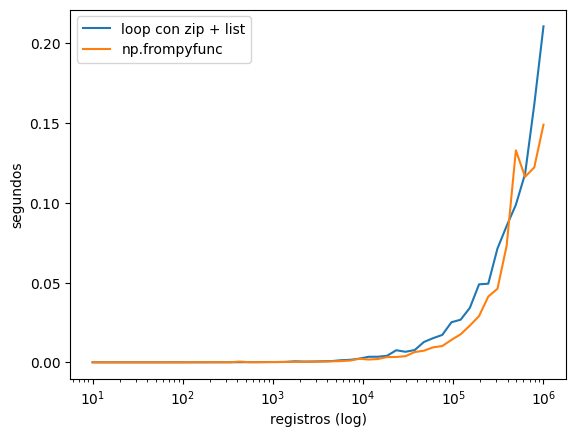

In [6]:
exp_2 = Exp()
exp_2.make_arrays(num=50)
funcs = [    
    (calculo_ganancia_total_a,'np.frompyfunc'),
    (calculo_ganancia_total_ba,'loop con zip + list')
]
np.random.shuffle(funcs)
for f in funcs:
    exp_2.do_exp(f[0], func_name= f[1])
exp_2.make_df()
exp_2.plot(title = 'exp 2')
exp_2.plot_ylog(title = 'exp 2')
exp_2.plot_ylog(xscale='log',xlabel='registros (log)')
exp_2.plot(xscale='log',xlabel='registros (log)')

random samples construidos en 4.9203267097473145 segundos
calculo ganancias con np.frompyfunc realizado en 34.50440979003906 segundos
calculo ganancias con loop con zip + list realizado en 46.16864466667175 segundos
df construida y validada


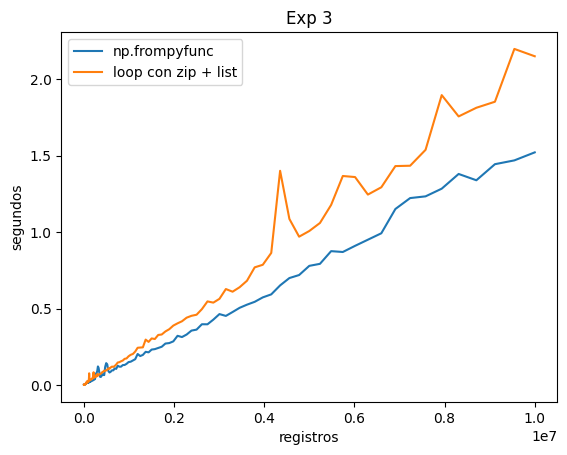

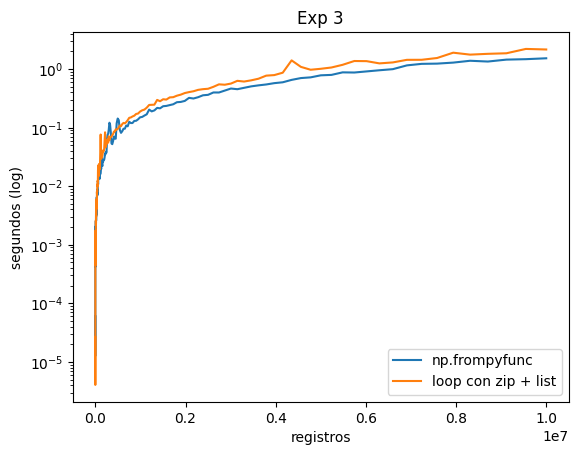

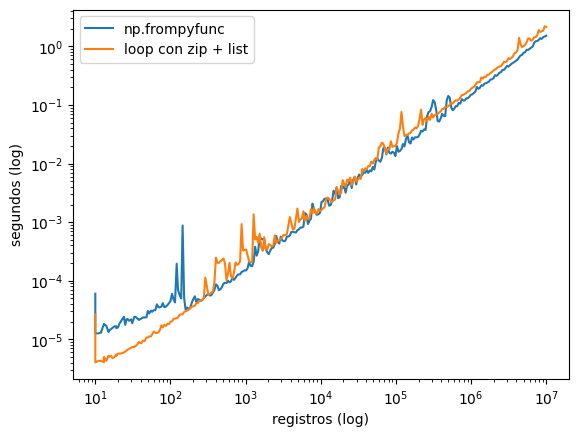

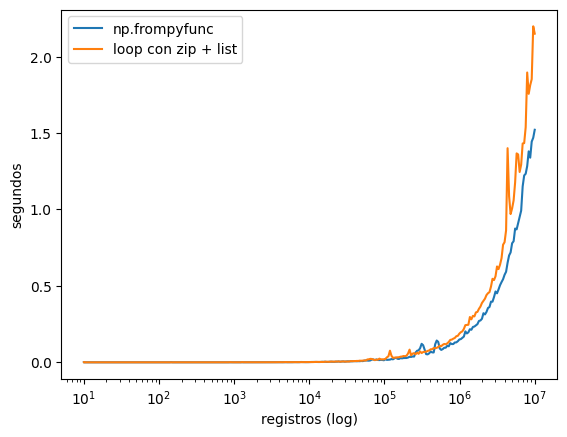

In [7]:
exp_3 = Exp()
exp_3.make_arrays(base_start=1,base_stop=7,num=300)
funcs = [    
    (calculo_ganancia_total_a,'np.frompyfunc'),
    (calculo_ganancia_total_ba,'loop con zip + list')
]
np.random.shuffle(funcs)
for f in funcs:
    exp_3.do_exp(f[0], func_name= f[1])
exp_3.make_df()
exp_3.plot(title='Exp 3')
exp_3.plot_ylog(title='Exp 3')
exp_3.plot_ylog(xscale='log',xlabel='registros (log)')
exp_3.plot(xscale='log',xlabel='registros (log)')

random samples construidos en 0.07581567764282227 segundos
calculo ganancias con np.frompyfunc realizado en 0.1574552059173584 segundos
calculo ganancias con loop con zip + list realizado en 0.19083642959594727 segundos
df construida y validada


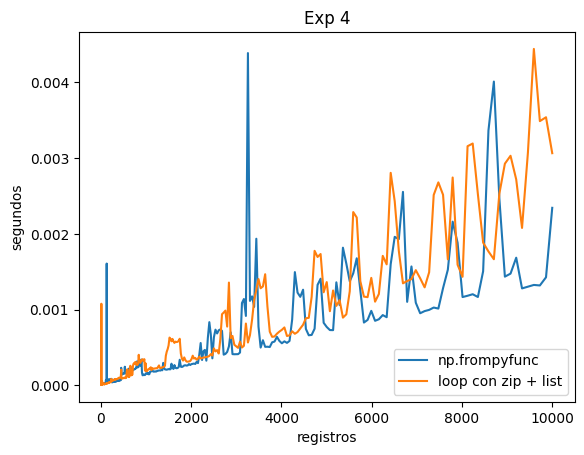

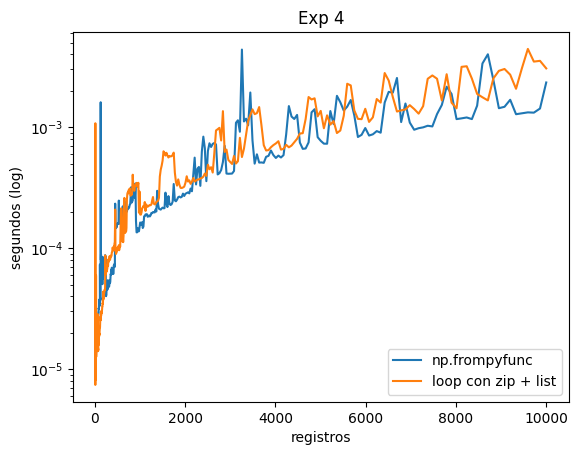

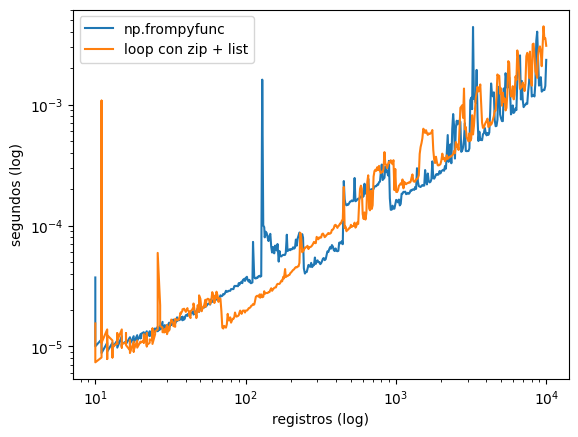

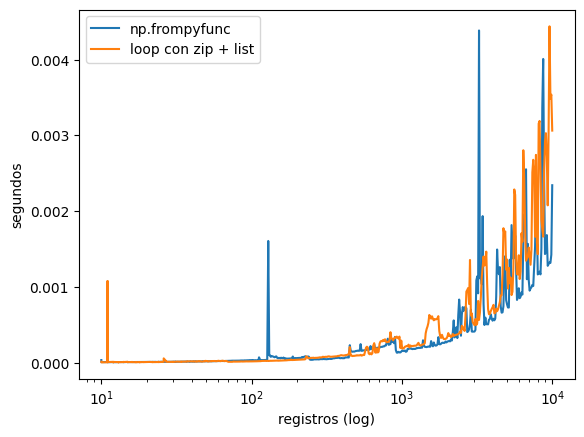

In [8]:
exp_4 = Exp()
exp_4.make_arrays(base_start=1,base_stop=4,num=500)
funcs = [    
    (calculo_ganancia_total_a,'np.frompyfunc'),
    (calculo_ganancia_total_ba,'loop con zip + list')
]
np.random.shuffle(funcs)
for f in funcs:
    exp_4.do_exp(f[0], func_name= f[1])
exp_4.make_df()
exp_4.plot(title='Exp 4')
exp_4.plot_ylog(title='Exp 4')
exp_4.plot_ylog(xscale='log',xlabel='registros (log)')
exp_4.plot(xscale='log',xlabel='registros (log)')

random samples construidos en 0.17638349533081055 segundos
calculo ganancias con np.frompyfunc realizado en 0.8651437759399414 segundos
calculo ganancias con loop con zip + list realizado en 1.212970495223999 segundos
df construida y validada


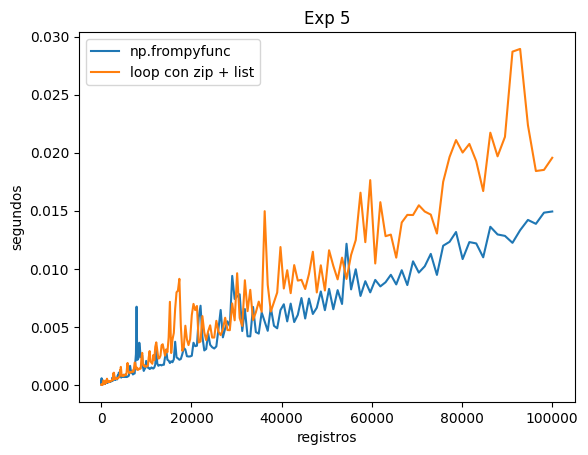

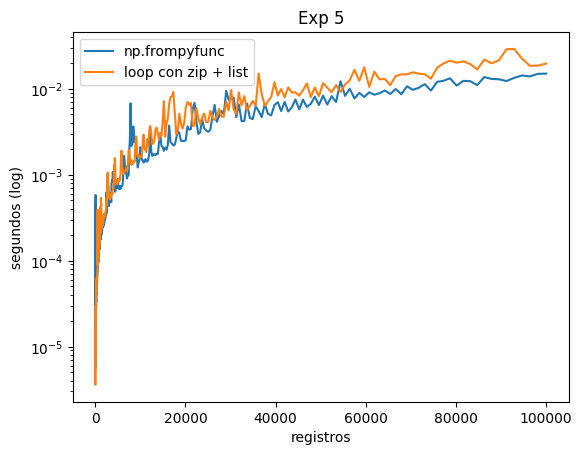

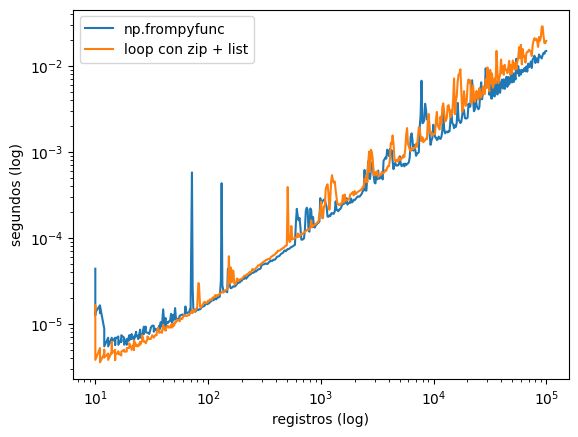

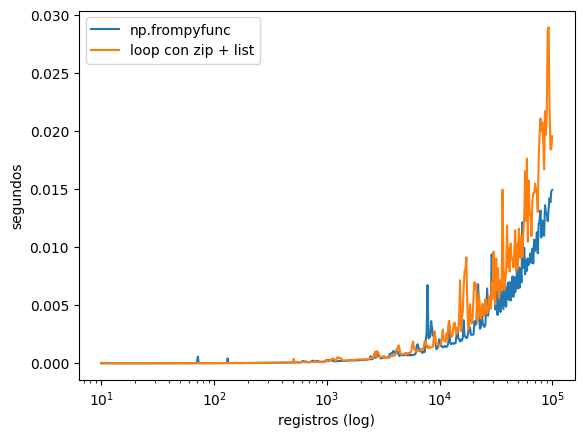

In [9]:
exp_5 = Exp()
exp_5.make_arrays(base_start=1,base_stop=5,num=500)
funcs = [    
    (calculo_ganancia_total_a,'np.frompyfunc'),
    (calculo_ganancia_total_ba,'loop con zip + list')
]
np.random.shuffle(funcs)
for f in funcs:
    exp_5.do_exp(f[0], func_name= f[1])
exp_5.make_df()
exp_5.plot(title='Exp 5')
exp_5.plot_ylog(title='Exp 5')
exp_5.plot_ylog(xscale='log',xlabel='registros (log)')
exp_5.plot(xscale='log',xlabel='registros (log)')

random samples construidos en 1.4180686473846436 segundos
calculo ganancias con loop con zip + list realizado en 10.135916948318481 segundos
calculo ganancias con list comprehension (c/ función registro) realizado en 11.874841213226318 segundos
df construida y validada


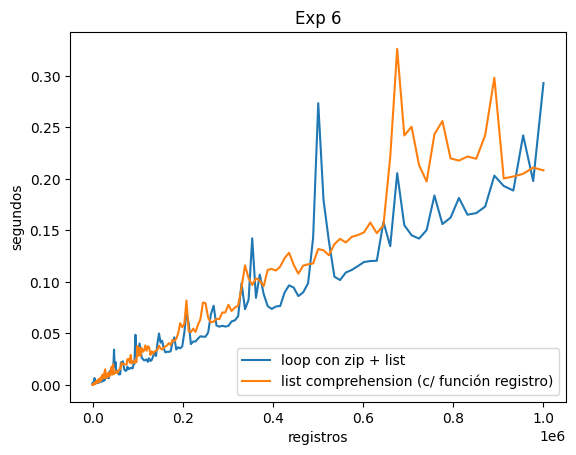

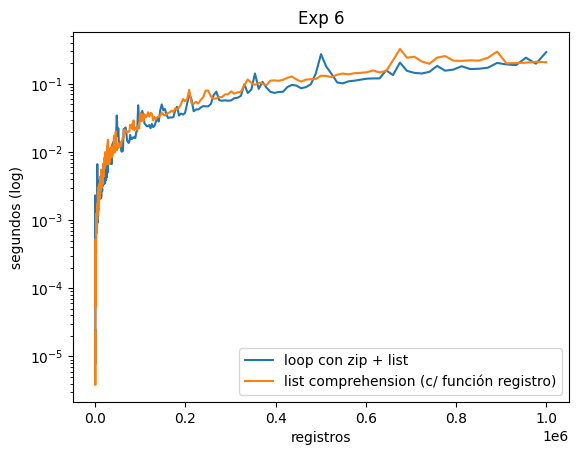

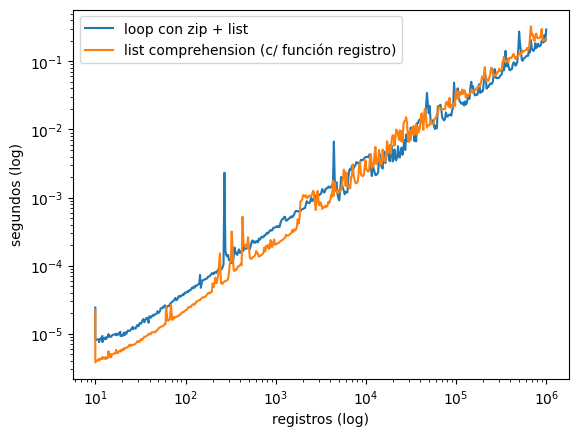

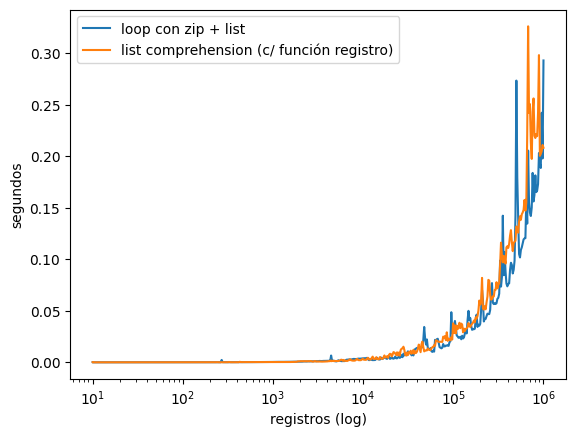

In [10]:
exp_6 = Exp()
exp_6.make_arrays(base_start=1,base_stop=6,num=500)
funcs = [    
    (calculo_ganancia_total_ba,'loop con zip + list'),
    (calculo_ganancia_total_bc,'list comprehension (c/ función registro)')
]
np.random.shuffle(funcs)
for f in funcs:
    exp_6.do_exp(f[0], func_name= f[1])
exp_6.make_df()
exp_6.plot(title='Exp 6')
exp_6.plot_ylog(title='Exp 6')
exp_6.plot_ylog(xscale='log',xlabel='registros (log)')
exp_6.plot(xscale='log',xlabel='registros (log)')

random samples construidos en 1.9205577373504639 segundos
calculo ganancias con loop con zip + list (if abreviado) realizado en 10.279003143310547 segundos
calculo ganancias con np.frompyfunc realizado en 7.772711753845215 segundos
calculo ganancias con list comprehension (c/ función registro) realizado en 11.336116313934326 segundos
df construida y validada


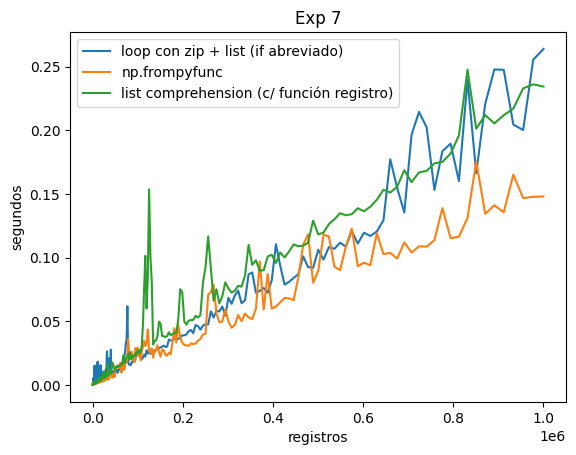

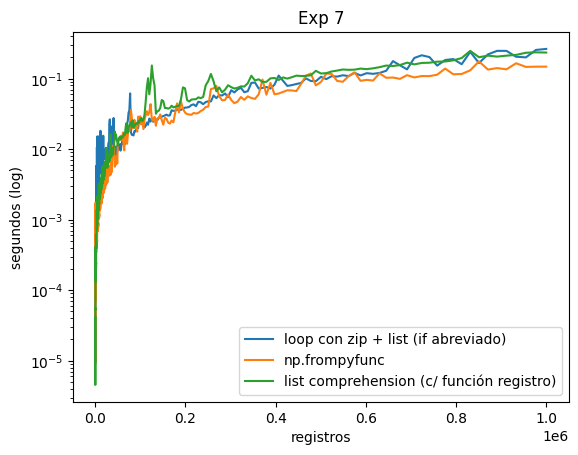

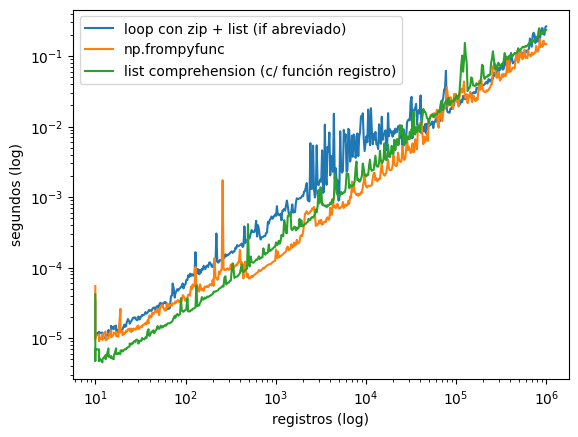

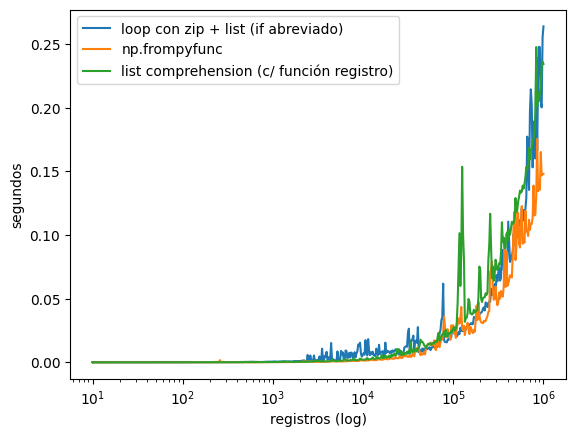

In [11]:
exp_7 = Exp()
exp_7.make_arrays(base_start=1,base_stop=6,num=500)
funcs = [
    (calculo_ganancia_total_a,'np.frompyfunc'),
    (calculo_ganancia_total_ba,'loop con zip + list (if abreviado)'),
    (calculo_ganancia_total_bc,'list comprehension (c/ función registro)')
]
np.random.shuffle(funcs)
for f in funcs:
    exp_7.do_exp(f[0], func_name= f[1])
exp_7.make_df()
exp_7.plot(title='Exp 7')
exp_7.plot_ylog(title='Exp 7')
exp_7.plot_ylog(xscale='log',xlabel='registros (log)')
exp_7.plot(xscale='log',xlabel='registros (log)')

random samples construidos en 1.1261935234069824 segundos
calculo ganancias con list comprehension (c/ función registro) realizado en 10.84370470046997 segundos
calculo ganancias con loop con zip + list (c/función registro) realizado en 15.318315267562866 segundos
df construida y validada


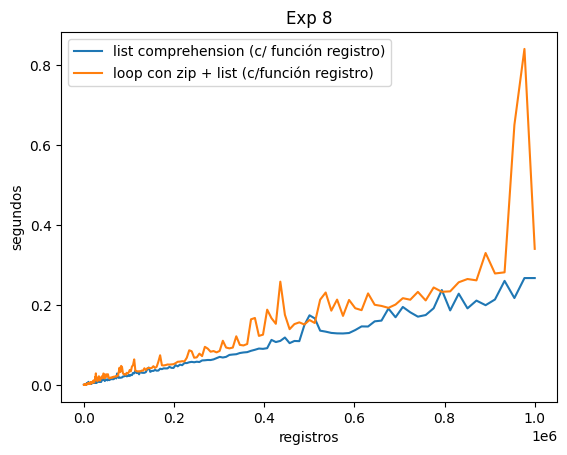

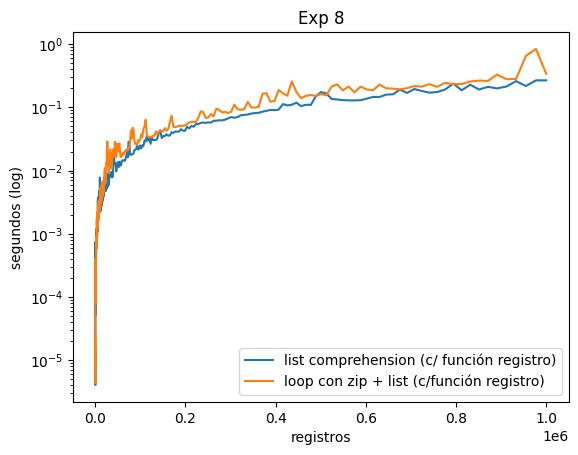

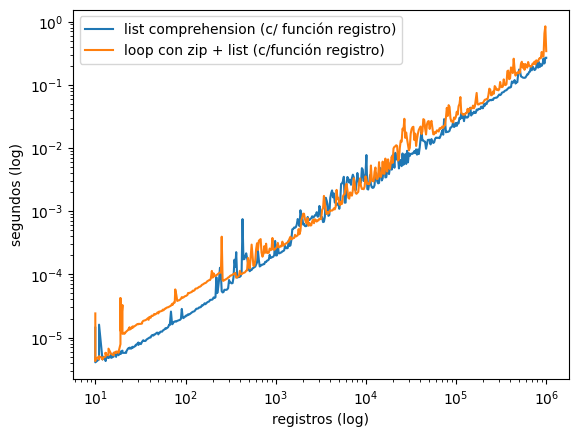

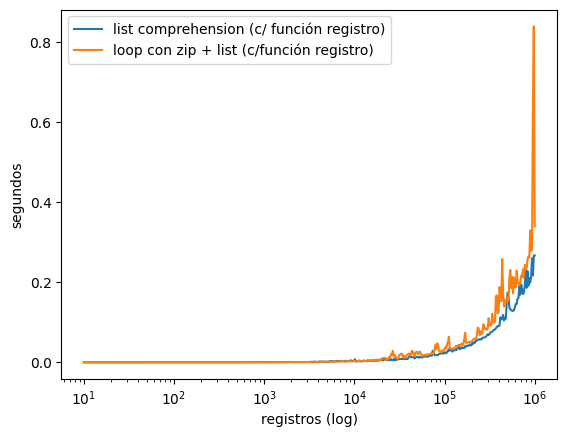

In [12]:
exp_8 = Exp()
exp_8.make_arrays(base_start=1,base_stop=6,num=500)
funcs = [    
    (calculo_ganancia_total_bb,'loop con zip + list (c/función registro)'),
    (calculo_ganancia_total_bc,'list comprehension (c/ función registro)')
]
np.random.shuffle(funcs)
for f in funcs:
    exp_8.do_exp(f[0], func_name= f[1])
exp_8.make_df()
exp_8.plot(title='Exp 8')
exp_8.plot_ylog(title='Exp 8')
exp_8.plot_ylog(xscale='log',xlabel='registros (log)')
exp_8.plot(xscale='log',xlabel='registros (log)')

random samples construidos en 2.2690231800079346 segundos
calculo ganancias con loop con zip + list (c/función registro) realizado en 26.133172035217285 segundos
calculo ganancias con list comprehension (c/ función registro) realizado en 24.64386773109436 segundos
df construida y validada


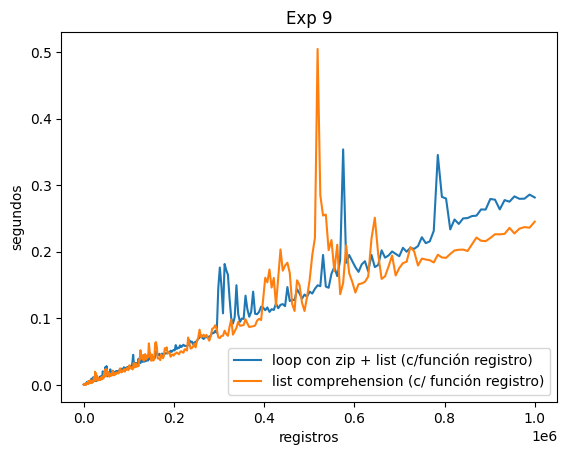

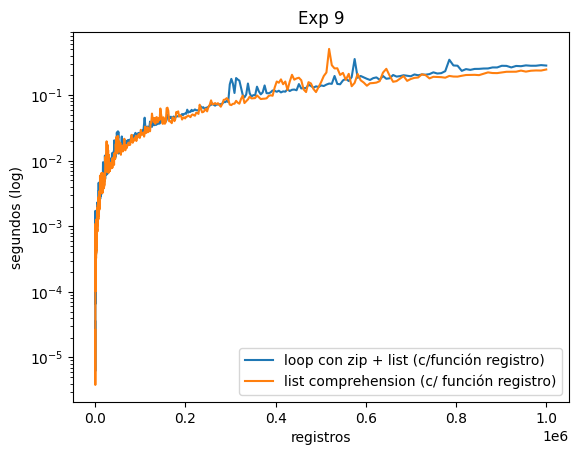

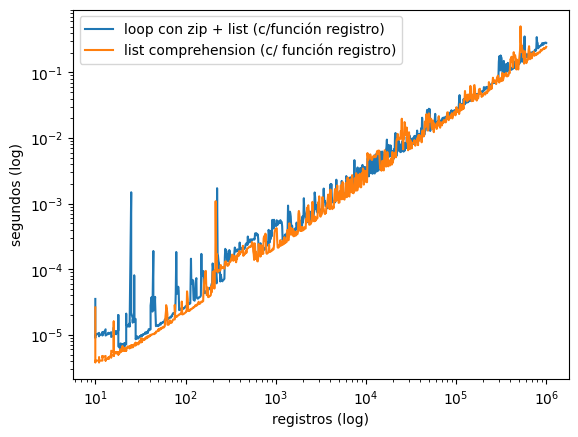

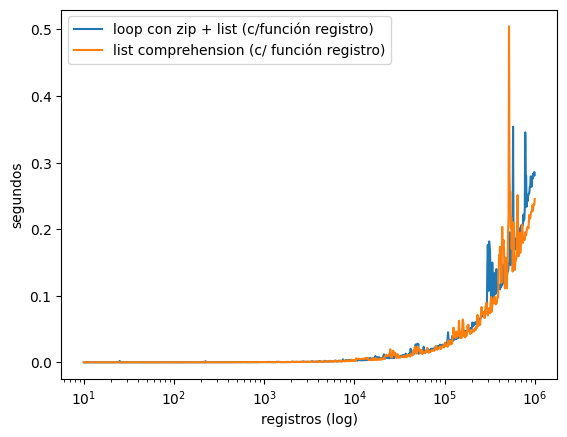

In [13]:
exp_9 = Exp()
exp_9.make_arrays(base_start=1,base_stop=6,num=1000)
funcs = [    
    (calculo_ganancia_total_bb,'loop con zip + list (c/función registro)'),
    (calculo_ganancia_total_bc,'list comprehension (c/ función registro)')
]
np.random.shuffle(funcs)
for f in funcs:
    exp_9.do_exp(f[0], func_name= f[1])
exp_9.make_df()
exp_9.plot(title='Exp 9')
exp_9.plot_ylog(title='Exp 9')
exp_9.plot_ylog(xscale='log',xlabel='registros (log)')
exp_9.plot(xscale='log',xlabel='registros (log)')

random samples construidos en 2.0111732482910156 segundos
calculo ganancias con loop con zip + list (c/función registro) realizado en 13.415690422058105 segundos
calculo ganancias con loop con zip + list (if abreviado) realizado en 9.065502643585205 segundos
df construida y validada


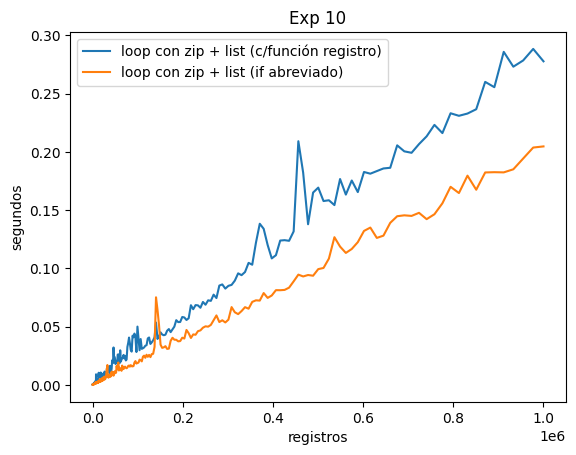

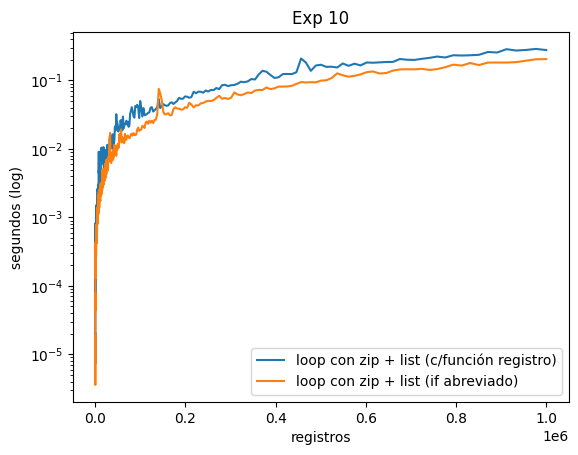

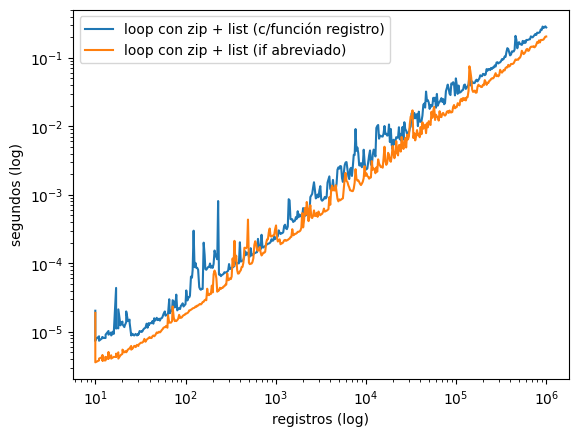

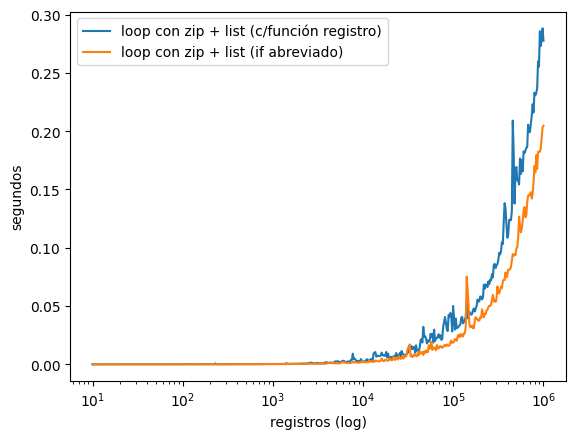

In [14]:
exp_10 = Exp()
exp_10.make_arrays(base_start=1,base_stop=6,num=500)
funcs = [    
    (calculo_ganancia_total_ba,'loop con zip + list (if abreviado)'),
    (calculo_ganancia_total_bb,'loop con zip + list (c/función registro)')
]
np.random.shuffle(funcs)
for f in funcs:
    exp_10.do_exp(f[0], func_name= f[1])
exp_10.make_df()
exp_10.plot(title='Exp 10')
exp_10.plot_ylog(title='Exp 10')
exp_10.plot_ylog(xscale='log',xlabel='registros (log)')
exp_10.plot(xscale='log',xlabel='registros (log)')